In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [24]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [26]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [27]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [28]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [29]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [30]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [31]:
products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [32]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [33]:
customers['Region'].value_counts()

,count
Region,
South America,59
Europe,50
North America,46
Asia,45


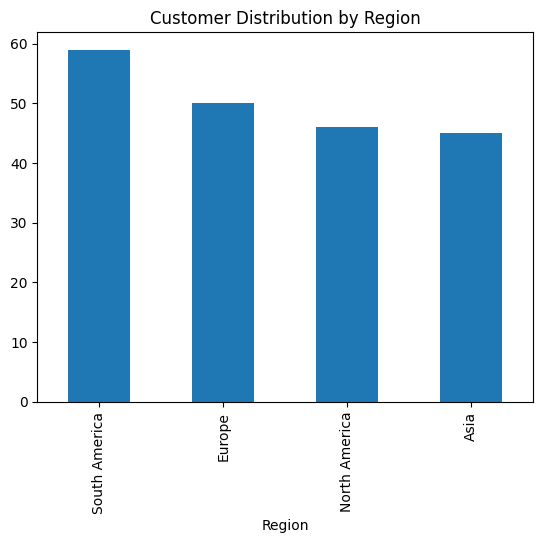

In [34]:
region_count = customers['Region'].value_counts()
region_count.plot(kind='bar', title="Customer Distribution by Region")
plt.show()


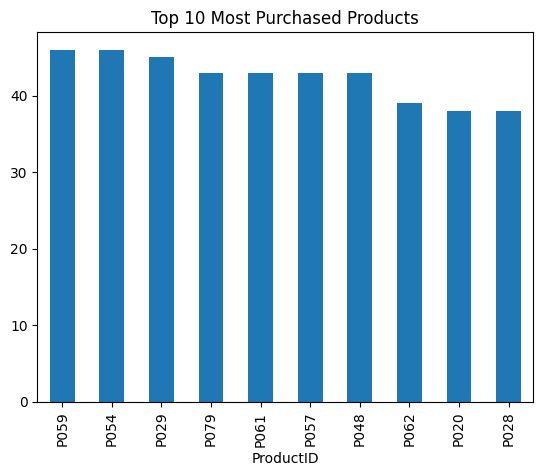

In [35]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='bar', title="Top 10 Most Purchased Products")
plt.show()

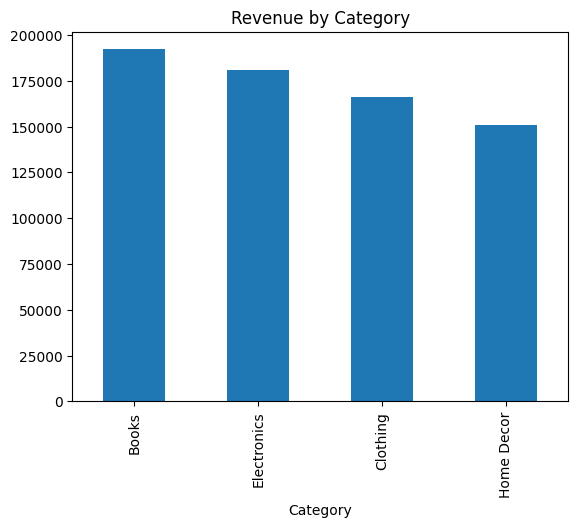

In [36]:
merged = transactions.merge(products, on='ProductID')
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title="Revenue by Category")
plt.show()

In [48]:
#Signup trends over time
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print("Signup Trends Over Years:\n", signup_trends)

Signup Trends Over Years:
 SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [49]:
# High-value customers
high_value_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("High-Value Customers (Top 5):\n", high_value_customers)

High-Value Customers (Top 5):
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np

In [38]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

# Merge datasets for comprehensive analysis
merged_df = transactions.merge(customers, on='CustomerID', how='left')
merged_df = merged_df.merge(products, on='ProductID', how='left')

In [41]:
customer_product_matrix = merged_df.pivot_table(
    index='CustomerID', columns='ProductID', values='Quantity', aggfunc='sum', fill_value=0
)

# Normalize the data
scaler = StandardScaler()
customer_product_scaled = scaler.fit_transform(customer_product_matrix)

In [42]:
# Compute cosine similarity
similarity_matrix = cosine_similarity(customer_product_scaled)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)


In [43]:
# Function to get top 3 similar customers for a given customer ID
def get_top_lookalikes(customer_id, n=3):
    if customer_id not in similarity_df.index:
        return []
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:n+1]
    return list(zip(similar_customers.index, similar_customers.values))

In [44]:
lookalike_results = {}
for customer_id in customers['CustomerID'][:20]:
    lookalike_results[customer_id] = get_top_lookalikes(customer_id)

In [45]:
lookalike_results

{'C0001': [('C0194', 0.4049275311893231),
  ('C0104', 0.3740015051203954),
  ('C0020', 0.36660865634533374)],
 'C0002': [('C0030', 0.40461685378594076),
  ('C0091', 0.38377803020909534),
  ('C0071', 0.32015798105808685)],
 'C0003': [('C0181', 0.4775717980039305),
  ('C0134', 0.47101615387800955),
  ('C0144', 0.4237999071645031)],
 'C0004': [('C0070', 0.3519014889798192),
  ('C0175', 0.3160978979266089),
  ('C0132', 0.27959855424498353)],
 'C0005': [('C0096', 0.48745613929263704),
  ('C0023', 0.47025182492905515),
  ('C0055', 0.3820996241448556)],
 'C0006': [('C0040', 0.48690905811550333),
  ('C0178', 0.3978109049066898),
  ('C0058', 0.3141630233621907)],
 'C0007': [('C0079', 0.6174415040345874),
  ('C0118', 0.47827697423174026),
  ('C0020', 0.4566150346666943)],
 'C0008': [('C0144', 0.32675054883392246),
  ('C0169', 0.2788847602830613),
  ('C0091', 0.2605603345519998)],
 'C0009': [('C0140', 0.5334414848517182),
  ('C0083', 0.5308424299367157),
  ('C0162', 0.49889269779677986)],
 'C0010

In [46]:
lookalike_df = pd.DataFrame({
    'CustomerID': lookalike_results.keys(),
    'Lookalikes': [str(v) for v in lookalike_results.values()]
})
lookalike_df.to_csv('Tushar_Tekta_Lookalike.csv', index=False)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import numpy as np

In [51]:
#Aggregate the customer data
customer_summary = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'Quantity': 'TotalQuantity',
    'ProductID': 'UniqueProducts'
}).reset_index()

In [52]:
# Normalize the data for clustering
scaler = StandardScaler()
customer_summary_scaled = scaler.fit_transform(customer_summary[['TotalSpending', 'TotalQuantity', 'UniqueProducts']])


In [53]:
num_clusters = 4  # Choose an appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(customer_summary_scaled)


In [54]:
db_index = davies_bouldin_score(customer_summary_scaled, customer_summary['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.90


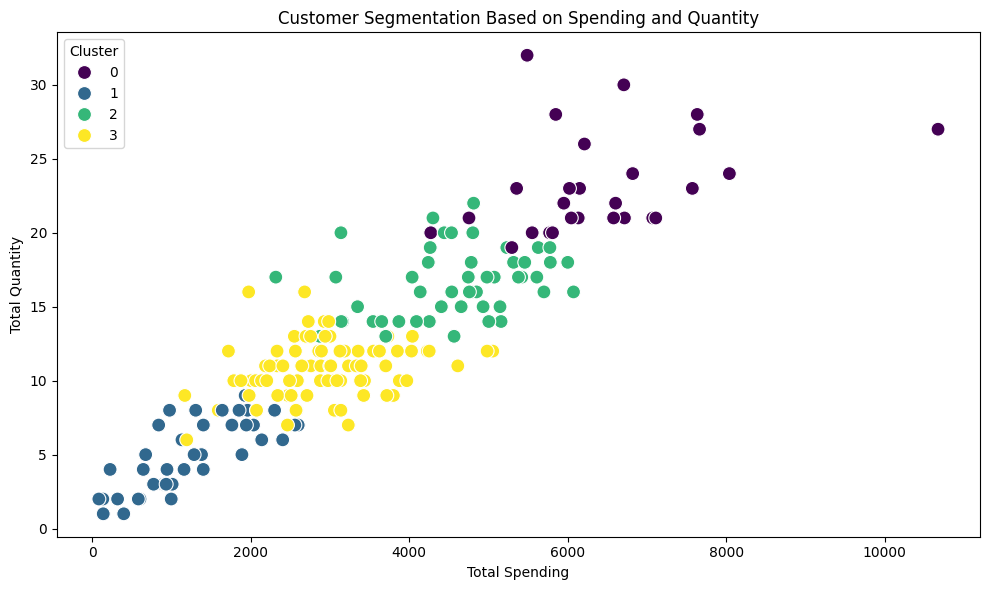

In [56]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_summary['TotalSpending'],
    y=customer_summary['TotalQuantity'],
    hue=customer_summary['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segmentation Based on Spending and Quantity')
plt.xlabel('Total Spending')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [57]:
customer_summary[['CustomerID', 'Cluster']].to_csv('Tushar_Tekta_Clustering.csv', index=False)

In [58]:
cluster_sizes = customer_summary['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 Cluster
3    80
2    51
1    41
0    27
Name: count, dtype: int64


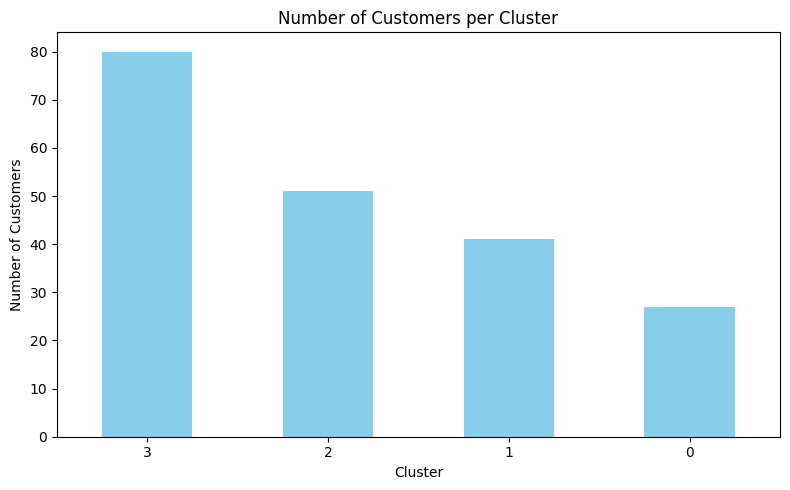

In [59]:
# Visualize cluster sizes
plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
